# 기계학습 특강 (2주차) 9월14일

- toc:true
- branch: master
- badges: true
- comments: false
- author: 최서연
- categories: [Special Topics in Machine Learning, 추천시스템, 텍스트분석, GAN]

## imports

In [231]:
#
from fastai.collab import * ## 추천시스템
from fastai.text.all import * ## 텍스트분석 
from fastai.vision.all import *  ## GAN (이미지분석) 
from fastai.vision.gan import * ## GAN (이미지생성)

In [232]:
import pandas as pd

## 이미지 자료분석 실습 (지난시간 복습)

### 1단계: 데이터의 정리

In [143]:
path = untar_data(URLs.PETS)/'images'

In [144]:
path.ls()

(#7393) [Path('/home/csy/.fastai/data/oxford-iiit-pet/images/Bombay_13.jpg'),Path('/home/csy/.fastai/data/oxford-iiit-pet/images/beagle_193.jpg'),Path('/home/csy/.fastai/data/oxford-iiit-pet/images/Ragdoll_8.jpg'),Path('/home/csy/.fastai/data/oxford-iiit-pet/images/boxer_106.jpg'),Path('/home/csy/.fastai/data/oxford-iiit-pet/images/keeshond_56.jpg'),Path('/home/csy/.fastai/data/oxford-iiit-pet/images/american_pit_bull_terrier_162.jpg'),Path('/home/csy/.fastai/data/oxford-iiit-pet/images/saint_bernard_136.jpg'),Path('/home/csy/.fastai/data/oxford-iiit-pet/images/staffordshire_bull_terrier_76.jpg'),Path('/home/csy/.fastai/data/oxford-iiit-pet/images/pug_173.jpg'),Path('/home/csy/.fastai/data/oxford-iiit-pet/images/american_pit_bull_terrier_117.jpg')...]

every files' list 

In [145]:
fnames = get_image_files(path)

In [146]:
fnames

(#7390) [Path('/home/csy/.fastai/data/oxford-iiit-pet/images/Bombay_13.jpg'),Path('/home/csy/.fastai/data/oxford-iiit-pet/images/beagle_193.jpg'),Path('/home/csy/.fastai/data/oxford-iiit-pet/images/Ragdoll_8.jpg'),Path('/home/csy/.fastai/data/oxford-iiit-pet/images/boxer_106.jpg'),Path('/home/csy/.fastai/data/oxford-iiit-pet/images/keeshond_56.jpg'),Path('/home/csy/.fastai/data/oxford-iiit-pet/images/american_pit_bull_terrier_162.jpg'),Path('/home/csy/.fastai/data/oxford-iiit-pet/images/saint_bernard_136.jpg'),Path('/home/csy/.fastai/data/oxford-iiit-pet/images/staffordshire_bull_terrier_76.jpg'),Path('/home/csy/.fastai/data/oxford-iiit-pet/images/pug_173.jpg'),Path('/home/csy/.fastai/data/oxford-iiit-pet/images/american_pit_bull_terrier_117.jpg')...]

image files' list

In [147]:
ImageDataLoaders.from_name_func??

Signature:
ImageDataLoaders.from_name_func(
    path,
    fnames,
    label_func,
    valid_pct=0.2,
    seed=None,
    item_tfms=None,
    batch_tfms=None,
    bs=64,
    val_bs=None,
    shuffle=True,
    device=None,
)
Source:   
    @classmethod
    def from_name_func(cls, path, fnames, label_func, **kwargs):
        "Create from the name attrs of `fnames` in `path`s with `label_func`"
        if sys.platform == 'win32' and isinstance(label_func, types.LambdaType) and label_func.__name__ == '<lambda>':
            # https://medium.com/@jwnx/multiprocessing-serialization-in-python-with-pickle-9844f6fa1812
            raise ValueError("label_func couldn't be lambda function on Windows")
        f = using_attr(label_func, 'name')
        return cls.from_path_func(path, fnames, f, **kwargs)
File:      ~/anaconda3/envs/csy/lib/python3.8/site-packages/fastai/vision/data.py
Type:      method


```python
def f(fname):
    if fname[0].isupper():
        return 'cat'
    else:
        return 'dog'
```

```python
f(x) = x+ 1
lambda x : x+1
```

In [148]:
f = lambda fname: 'cat' if fname[0].isupper() else 'dog'

In [149]:
f('s')

'dog'

In [150]:
f('D')

'cat'

```python
dls = ImageDataLoaders.from_name_func(
    path, 
    fnames,
    lambda fname: 'cat' if fname[0].isupper() else 'dog')
    item_tfms=Resize(224)) # 사이즈가 달라서 통일
```

In [151]:
dls = ImageDataLoaders.from_name_func(
    path, 
    fnames,
    f, # f대신 (lambda fname: 'cat' if fname[0].isupper() else 'dog') 를 넣어도 가능
    item_tfms=Resize(224)) # 사이즈가 달라서 통일

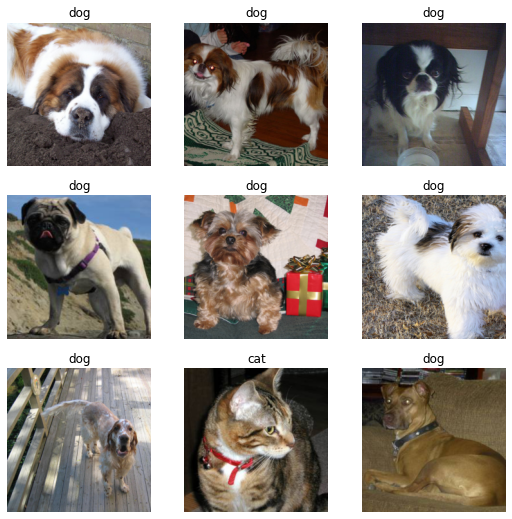

In [152]:
dls.show_batch()

### 2단계: lrnr 오브젝트 생성

In [154]:
cnn_learner??

Signature:
cnn_learner(
    dls,
    arch,
    normalize=True,
    n_out=None,
    pretrained=True,
    config=None,
    loss_func=None,
    opt_func=<function Adam at 0x7f9971cbd550>,
    lr=0.001,
    splitter=None,
    cbs=None,
    metrics=None,
    path=None,
    model_dir='models',
    wd=None,
    wd_bn_bias=False,
    train_bn=True,
    moms=(0.95, 0.85, 0.95),
    cut=None,
    n_in=3,
    init=<function kaiming_normal_ at 0x7f99ca00e8b0>,
    custom_head=None,
    concat_pool=True,
    lin_ftrs=None,
    ps=0.5,
    first_bn=True,
    bn_final=False,
    lin_first=False,
    y_range=None,
)
Source:   
@delegates(create_cnn_model)
def cnn_learner(dls, arch, normalize=True, n_out=None, pretrained=True, config=None,
                # learner args
                loss_func=None, opt_func=Adam, lr=defaults.lr, splitter=None, cbs=None, metrics=None, path=None,
                model_dir='models', wd=None, wd_bn_bias=False, train_bn=True, moms=(0.95,0.85,0.95),
                # othe

```python
!cat ~/anaconda3/envs/csy/lib/python3.8/site-packages/fastai/vision/learner.py
```
이 코드로 존재하는 함수의 정의 확인 가능

어디 소속된 함수인지 확인 하기 위해

fastai에 소속된 cnn_leaner,따라서 fastai를  import해야 나타나지.

In [155]:
lrnr = cnn_learner(dls,resnet34,metrics=error_rate)

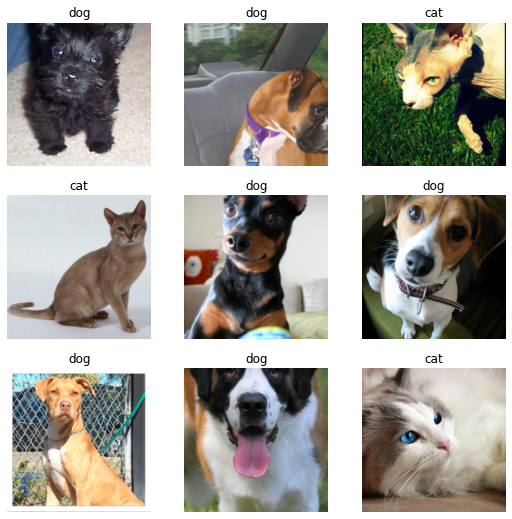

In [156]:
lrnr.dls.show_batch()

In [157]:
id(lrnr.dls)

140298350195664

In [158]:
id(dls)

140298350195664

주소가 같다. 같은 역할

lrnr에 dls가 소속되어 있다고 생각(?)
- 포스트잇을 위에 덧붙인다 생각

### 3단계: lrnr.학습()

학습하는 fine_tune 이외에 여러가지 있음
- fine_tune 학습된 일부는 유지하고 바꿀 부분만 학습시키는 법: transfer learning

for exampel: cnn의 1d에서는 끝에만 학습

In [159]:
lrnr.fine_tune(1)

epoch,train_loss,valid_loss,error_rate,time
0,0.154644,0.029743,0.009472,00:09


epoch,train_loss,valid_loss,error_rate,time
0,0.058054,0.022042,0.006766,00:11


- fine_tune()은 모든 가중치를 학습하는 것이 아니라 일부만 학습하는 것임. 
- fine_tune()이외이 방법으로 학습할 수도 있음.

### 4단계: lrnr.예측()

(방법1) lrnr.predict() 함수를 이용

In [160]:
lrnr.predict('2022-09-07-dogs.jpeg') # 방법1-1
#lrnr.predict(PILImage.create('2022-09-07-dogs.jpeg')) # 방법1-2
#lrnr.predict(path.ls()[0]) # 방법1-3

('dog', TensorBase(1), TensorBase([2.5710e-04, 9.9974e-01]))

컴퓨터가 이해하기 쉬운 방법인 1-2번째 방법

In [161]:
lrnr.predict(PILImage.create('2022-09-07-dogs.jpeg'))

('dog', TensorBase(1), TensorBase([2.5710e-04, 9.9974e-01]))

In [162]:
lrnr.predict(path.ls()[0])

('cat', TensorBase(0), TensorBase([1.0000e+00, 8.2892e-07]))

---

```pyhton
dir(lrnr.model)
```
여기에 _call_있으면 함수처럼 사용 가능

---

(방법2) lrnr.model(X) 를 이용: X의 shape이 (?,3,224,224)의 형태의 텐서이어야함

In [163]:
type(dls.one_batch())

tuple

끝에 괄호로 묶여 있으면 tuple

In [164]:
X,y = dls.one_batch() # 방법2
lrnr.model(X[0:1]) 

TensorBase([[-8.9108,  6.8304]], device='cuda:0', grad_fn=<AliasBackward0>)

In [165]:
X[1].shape

torch.Size([3, 224, 224])

In [166]:
X[:2].shape

torch.Size([2, 3, 224, 224])

In [167]:
X.shape

torch.Size([64, 3, 224, 224])

image의 사이즈 224 * 224
- 3개의 채널
- 64개
- image, 입력

In [168]:
y.shape

torch.Size([64])

- 예측값

In [169]:
y[:3]

TensorCategory([1, 0, 1], device='cuda:0')

```python
lrnr.model(X[0])
```
오류 뜬다.
- torch.Size([3, 224, 224])
- shape을
- torch.Size([?, 3, 224, 224])
- 이런 식으로 만들어주자, 입력

In [170]:
lrnr.model(X[:3])

TensorBase([[ -8.9108,   6.8309],
        [ 11.4406, -11.6370],
        [ -5.8409,   6.8183]], device='cuda:0', grad_fn=<AliasBackward0>)

왼쪽이 크면 0, 오른쪽이 크면 1

## 프로그래밍 과정 

### 프로그래밍 과정 overview

`-` overview 

(1) `dls` 오브젝트 생성

(2) `lrnr` 오브젝트 생성 

(3) `lrnr.학습()` 

(4) `lrnr.예측()`

### 이미지분석, 추천시스템, 텍스트분석, GAN 분석과정 비교 

`-` 비교

| |이미지분석(CNN) | 추천시스템 | 텍스트분석 | GAN | 
|:-:|:-:|:-:|:-:|:-:|
|1단계|ImageDataLoaders|CollabDataLoaders| TextDataLoaders | DataBlock -> dls |  
|2단계|cnn_learner()|collab_learner()| language_model_learner() | GANLearner.wgan() | 
|3단계|lrnr.fine_tune(1)|lrnr.fit()| lrnr.fit() | lrnr.fit() |
|4단계|lrnr.predict(), lrnr.model(X)|lrnr.model(X)| lrnr.predict() | | 

## 추천시스템 실습

### 1단계

github에서 파일의 raw click하여 주소 가져오기

wget사용하면 주소의 data 바로 다운 가능

```python
!wget https://raw.githubusercontent.com/guebin/DL2022/master/_notebooks/2022-09-08-rcmd_view.csv
```

In [171]:
df_view = pd.read_csv('https://raw.githubusercontent.com/guebin/DL2022/master/_notebooks/2022-09-08-rcmd_view.csv')
df_view

,커피1,커피2,커피3,커피4,커피5,커피6,커피7,커피8,커피9,커피10,홍차1,홍차2,홍차3,홍차4,홍차5,홍차6,홍차7,홍차8,홍차9,홍차10
0,4.149209,NaN,NaN,4.078139,4.033415,4.071871,NaN,NaN,NaN,NaN,1.142659,1.109452,NaN,0.603118,1.084308,NaN,0.906524,NaN,NaN,0.903826
1,4.031811,NaN,NaN,3.822704,NaN,NaN,NaN,4.071410,3.996206,NaN,NaN,0.839565,1.011315,NaN,1.120552,0.911340,NaN,0.860954,0.871482,NaN
2,4.082178,4.196436,NaN,3.956876,NaN,NaN,NaN,4.450931,3.972090,NaN,NaN,NaN,NaN,0.983838,NaN,0.918576,1.206796,0.913116,NaN,0.956194
3,NaN,4.000621,3.895570,NaN,3.838781,3.967183,NaN,NaN,NaN,4.105741,1.147554,NaN,1.346860,NaN,0.614099,1.297301,NaN,NaN,NaN,1.147545
4,NaN,NaN,NaN,NaN,3.888208,NaN,3.970330,3.979490,NaN,4.010982,NaN,0.920995,1.081111,0.999345,NaN,1.195183,NaN,0.818332,1.236331,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.511905,1.066144,NaN,1.315430,NaN,1.285778,NaN,0.678400,1.023020,0.886803,NaN,4.055996,NaN,NaN,4.156489,4.127622,NaN,NaN,NaN,NaN
96,NaN,1.035022,NaN,1.085834,NaN,0.812558,NaN,1.074543,NaN,0.852806,3.894772,NaN,4.071385,3.935935,NaN,NaN,3.989815,NaN,NaN,4.267142
97,NaN,1.115511,NaN,1.101395,0.878614,NaN,NaN,NaN,1.329319,NaN,4.125190,NaN,4.354638,3.811209,4.144648,NaN,NaN,4.116915,3.887823,NaN
98,NaN,0.850794,NaN,NaN,0.927884,0.669895,NaN,NaN,0.665429,1.387329,NaN,NaN,4.329404,4.111706,3.960197,NaN,NaN,NaN,3.725288,4.122072


컴퓨터가 좋아하는 타입은 아님

- row0 - row49 에 해당하는 유저는 커피를 선호
- row50 - row99 에 해당하는 유저는 홍차를 선호

위의 자료는 비효율적, tidy data로 바꿔주자, 아래와 같이 정리함으로써 저장할 data도 줄어든다.

In [172]:
df = pd.read_csv('https://raw.githubusercontent.com/guebin/DL2022/master/_notebooks/2022-09-08-rcmd_anal.csv')
df

,user,item,rating,item_name
0,1,15,1.084308,홍차5
1,1,1,4.149209,커피1
2,1,11,1.142659,홍차1
3,1,5,4.033415,커피5
4,1,4,4.078139,커피4
...,...,...,...,...
995,100,18,4.104276,홍차8
996,100,17,4.164773,홍차7
997,100,14,4.026915,홍차4
998,100,4,0.838720,커피4


- 컴퓨터는 이러한 형태를 더 분석하기 좋아한다. 

```python
!cat 파일명
```
data 도 확인 가능하다

```python
!wget https://raw.githubusercontent.com/guebin/DL2022/master/_notebooks/2022-09-08-rcmd_anal.csv
```

```python
!cat Real_estate_valuation_data_set.csv
```

---

In [173]:
df.item.unique(),df.user.unique()
# 유저는 1~100 으로 아이템은 1~20으로 번호가 매겨져 있음 

(array([15,  1, 11,  5,  4, 14,  6, 20, 12, 17,  8,  9, 13, 19, 18, 16,  2,
         3, 10,  7]),
 array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
         14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
         27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
         40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
         53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
         66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
         79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
         92,  93,  94,  95,  96,  97,  98,  99, 100]))

- user는 1~100 존재
- item은 1~20 존재

---

In [174]:
dls=CollabDataLoaders.from_df(df)

batch 데이터들의 group

In [175]:
dls.show_batch()

,user,item,rating
0,59,3,1.198462
1,7,7,4.154308
2,40,1,3.897912
3,60,18,3.954355
4,18,3,4.243868
5,83,16,3.753443
6,73,4,1.152405
7,24,6,4.230412
8,99,19,3.725288
9,15,19,0.950701


In [176]:
X,y= dls.one_batch()

In [177]:
type(X)

torch.Tensor

In [178]:
type(y)

torch.Tensor

In [179]:
type(dls.one_batch())

tuple

In [180]:
X[0],y[0]

(tensor([67, 18]), tensor([3.5310]))

- 64번 유저가 15번 아이템을 먹었을때 평점을 4.1146 주었음 

### 2단계 

In [181]:
collab_learner??

Signature:
collab_learner(
    dls,
    n_factors=50,
    use_nn=False,
    emb_szs=None,
    layers=None,
    config=None,
    y_range=None,
    loss_func=None,
    opt_func=<function Adam at 0x7f9971cbd550>,
    lr=0.001,
    splitter=<function trainable_params at 0x7f997f97d940>,
    cbs=None,
    metrics=None,
    path=None,
    model_dir='models',
    wd=None,
    wd_bn_bias=False,
    train_bn=True,
    moms=(0.95, 0.85, 0.95),
)
Source:   
@delegates(Learner.__init__)
def collab_learner(dls, n_factors=50, use_nn=False, emb_szs=None, layers=None, config=None, y_range=None, loss_func=None, **kwargs):
    "Create a Learner for collaborative filtering on `dls`."
    emb_szs = get_emb_sz(dls, ifnone(emb_szs, {}))
    if loss_func is None: loss_func = MSELossFlat()
    if config is None: config = tabular_config()
    if y_range is not None: config['y_range'] = y_range
    if layers is None: layers = [n_factors]
    if use_nn: model = EmbeddingNN(emb_szs=emb_szs, layers=layers, **confi

In [182]:
lrnr = collab_learner(dls,y_range=(0,5)) # y_range는 평점의 범위

y는 평점이니까 0~5까지의 범위를 넣어주자

### 3단계

In [184]:
lrnr.fit(30) # 총 30번 정도 해야 적합이 잘된다. 

epoch,train_loss,valid_loss,time
0,0.872487,0.880539,00:00
1,0.750217,0.666904,00:00
2,0.634042,0.491854,00:00
3,0.530673,0.355879,00:00
4,0.438192,0.254514,00:00
5,0.358485,0.183228,00:00
6,0.292761,0.135007,00:00
7,0.238606,0.103001,00:00
8,0.195197,0.082420,00:00
9,0.160645,0.069388,00:00


### 4단계

`-` 이미 있는 데이터를 예측

`-` 하나의 배치 전체를 예측 

```python
lrnr.model(X)
```
만 넣으면 에러뜬다.

In [186]:
!nvidia-smi

Sat Sep 17 11:25:38 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 495.46       Driver Version: 495.46       CUDA Version: 11.5     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  NVIDIA GeForce ...  Off  | 00000000:65:00.0 Off |                  N/A |
|  0%   49C    P2   130W / 420W |   9190MiB / 24268MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

GPU 확인 가능

GPU아님 CPU로 올리자

In [187]:
yhat=lrnr.model(X.to("cuda:0"))
yhat

tensor([4.0022, 0.8971, 1.0122, 4.0626, 4.0393, 3.9172, 1.0121, 3.9306, 1.0728,
        4.0066, 4.1345, 1.0670, 3.9689, 0.9165, 3.8761, 1.0799, 4.0241, 4.1283,
        1.0680, 0.9263, 0.9951, 1.0700, 4.1053, 3.9279, 4.0750, 3.9701, 4.0824,
        0.9645, 4.0569, 4.1607, 4.1053, 4.0153, 3.8762, 4.1508, 4.0457, 1.0644,
        4.1041, 3.9917, 1.1538, 3.9886, 4.1019, 4.1151, 0.8893, 3.9962, 3.9487,
        4.0217, 3.9635, 4.0949, 0.9402, 1.0230, 3.8240, 1.1349, 4.1712, 4.0478,
        1.2141, 1.0838, 1.0101, 4.0088, 3.8642, 3.8462, 4.0495, 1.0239, 1.1524,
        3.9563], device='cuda:0', grad_fn=<AddBackward0>)

In [188]:
y.reshape(-1)

tensor([3.5310, 0.7650, 0.9585, 3.8240, 4.0090, 3.9419, 0.9086, 3.9788, 1.2529,
        4.1442, 4.3312, 1.3018, 4.1120, 0.6475, 3.8708, 0.5924, 4.0288, 3.9744,
        1.2715, 1.1845, 0.6402, 1.0309, 3.8262, 4.0136, 4.3835, 3.9750, 4.1260,
        1.2705, 3.8104, 3.8922, 4.0957, 3.9446, 3.8039, 4.0822, 4.0258, 0.8088,
        4.1383, 3.9530, 0.9689, 4.2304, 4.3559, 3.9682, 0.7231, 3.9574, 4.0006,
        3.9478, 3.7778, 4.1178, 0.9501, 0.9177, 3.8265, 0.8246, 4.6297, 4.2917,
        0.9188, 1.2257, 0.9408, 3.6977, 4.0443, 3.7867, 4.0553, 1.0100, 1.1910,
        3.8817])

- lrnr.model()은 GPU메모리에 존재하고 X는 일반메모리에 존재하므로 X를 GPU메모리로 옮겨주어야 함
- X.to("cuda:0")을 통하여 X를 GPU메모리로 옮기는 작업을 수행할 수 있다. 

`-` 하나의 유저가 하나의 아이템을 선택했다고 가정하고 예측 (주어진 자료중에서 예측)

In [189]:
X.shape

torch.Size([64, 2])

In [190]:
X[0:1]

tensor([[67, 18]])

`-` 1번 user가 커피2 마셨을때
- 예상: 4점 근처

In [191]:
lrnr.model(X[0:1].to("cuda:0"))

tensor([4.0022], device='cuda:0', grad_fn=<AddBackward0>)

In [192]:
lrnr.model(tensor([[1,2]]).to("cuda:0"))

tensor([4.0010], device='cuda:0', grad_fn=<AddBackward0>)

- 18번 유저가 5번 아이템(커피)를 먹는다면? 

In [193]:
lrnr.model(X[0:1].to("cuda:0"))

tensor([4.0022], device='cuda:0', grad_fn=<AddBackward0>)

- 평점은 4.1128정도 될것

`-` 하나의 유저가 하나의 아이템을 선택했다고 가정하고 예측 (주어지지 않은 자료중에서 예측)

In [194]:
X[0:1]

tensor([[67, 18]])

In [195]:
Xnew = torch.tensor([[1,  2]])

In [196]:
lrnr.model(Xnew.to("cuda:0"))

tensor([4.0010], device='cuda:0', grad_fn=<AddBackward0>)

## 텍스트분석 실습

timeseries 와 text 순서가 중요!
- 가장 잘 응용할 수 있는 게 chatbot챗봇
    - 나는 $\to$ 학교에 $\to$ 갔다.

timeseries는 뒤를 정확히 맞춰야 하지만, text는 그렇지 않..?

### 1단계

In [197]:
df = pd.DataFrame({'text':['h e l l o . h e l l o ! h e l l o ? h e l l o !! h e l l o ??']*20000})
df

,text
0,h e l l o . h e l l o ! h e l l o ? h e l l o !! h e l l o ??
1,h e l l o . h e l l o ! h e l l o ? h e l l o !! h e l l o ??
2,h e l l o . h e l l o ! h e l l o ? h e l l o !! h e l l o ??
3,h e l l o . h e l l o ! h e l l o ? h e l l o !! h e l l o ??
4,h e l l o . h e l l o ! h e l l o ? h e l l o !! h e l l o ??
...,...
19995,h e l l o . h e l l o ! h e l l o ? h e l l o !! h e l l o ??
19996,h e l l o . h e l l o ! h e l l o ? h e l l o !! h e l l o ??
19997,h e l l o . h e l l o ! h e l l o ? h e l l o !! h e l l o ??
19998,h e l l o . h e l l o ! h e l l o ? h e l l o !! h e l l o ??


In [198]:
TextDataLoaders.from_df??

Signature:
TextDataLoaders.from_df(
    df,
    path='.',
    valid_pct=0.2,
    seed=None,
    text_col=0,
    label_col=1,
    label_delim=None,
    y_block=None,
    text_vocab=None,
    is_lm=False,
    valid_col=None,
    tok_tfm=None,
    tok_text_col='text',
    seq_len=72,
    backwards=False,
    bs=64,
    val_bs=None,
    shuffle=True,
    device=None,
)
Source:   
    @classmethod
    @delegates(DataLoaders.from_dblock)
    def from_df(cls, df, path='.', valid_pct=0.2, seed=None, text_col=0, label_col=1, label_delim=None, y_block=None,
                text_vocab=None, is_lm=False, valid_col=None, tok_tfm=None, tok_text_col="text", seq_len=72, backwards=False, **kwargs):
        "Create from `df` in `path` with `valid_pct`"
        blocks = [TextBlock.from_df(text_col, text_vocab, is_lm, seq_len, backwards, tok=tok_tfm)]
        if y_block is None and not is_lm:
            blocks.append(MultiCategoryBlock if is_listy(label_col) and len(label_col) > 1 else CategoryBlock)
   

```python
is_lm = False
```
다음 자료를 예측하고 싶을때


```python
is_lm=True
```
- classification을 수행하고 싶을 때
- 생성에 목적

In [199]:
dls = TextDataLoaders.from_df(df,text_col='text',is_lm=True) 

In [200]:
dls.show_batch()

,text,text_
0,xxbos h e l l o . h e l l o ! h e l l o ? h e l l o ! ! h e l l o ? ? xxbos h e l l o . h e l l o ! h e l l o ? h e l l o ! ! h e l l o ? ? xxbos h e l l o,h e l l o . h e l l o ! h e l l o ? h e l l o ! ! h e l l o ? ? xxbos h e l l o . h e l l o ! h e l l o ? h e l l o ! ! h e l l o ? ? xxbos h e l l o .
1,? xxbos h e l l o . h e l l o ! h e l l o ? h e l l o ! ! h e l l o ? ? xxbos h e l l o . h e l l o ! h e l l o ? h e l l o ! ! h e l l o ? ? xxbos h e l l,xxbos h e l l o . h e l l o ! h e l l o ? h e l l o ! ! h e l l o ? ? xxbos h e l l o . h e l l o ! h e l l o ? h e l l o ! ! h e l l o ? ? xxbos h e l l o
2,? ? xxbos h e l l o . h e l l o ! h e l l o ? h e l l o ! ! h e l l o ? ? xxbos h e l l o . h e l l o ! h e l l o ? h e l l o ! ! h e l l o ? ? xxbos h e l,? xxbos h e l l o . h e l l o ! h e l l o ? h e l l o ! ! h e l l o ? ? xxbos h e l l o . h e l l o ! h e l l o ? h e l l o ! ! h e l l o ? ? xxbos h e l l
3,o ? ? xxbos h e l l o . h e l l o ! h e l l o ? h e l l o ! ! h e l l o ? ? xxbos h e l l o . h e l l o ! h e l l o ? h e l l o ! ! h e l l o ? ? xxbos h e,? ? xxbos h e l l o . h e l l o ! h e l l o ? h e l l o ! ! h e l l o ? ? xxbos h e l l o . h e l l o ! h e l l o ? h e l l o ! ! h e l l o ? ? xxbos h e l
4,l o ? ? xxbos h e l l o . h e l l o ! h e l l o ? h e l l o ! ! h e l l o ? ? xxbos h e l l o . h e l l o ! h e l l o ? h e l l o ! ! h e l l o ? ? xxbos h,o ? ? xxbos h e l l o . h e l l o ! h e l l o ? h e l l o ! ! h e l l o ? ? xxbos h e l l o . h e l l o ! h e l l o ? h e l l o ! ! h e l l o ? ? xxbos h e
5,l l o ? ? xxbos h e l l o . h e l l o ! h e l l o ? h e l l o ! ! h e l l o ? ? xxbos h e l l o . h e l l o ! h e l l o ? h e l l o ! ! h e l l o ? ? xxbos,l o ? ? xxbos h e l l o . h e l l o ! h e l l o ? h e l l o ! ! h e l l o ? ? xxbos h e l l o . h e l l o ! h e l l o ? h e l l o ! ! h e l l o ? ? xxbos h
6,e l l o ? ? xxbos h e l l o . h e l l o ! h e l l o ? h e l l o ! ! h e l l o ? ? xxbos h e l l o . h e l l o ! h e l l o ? h e l l o ! ! h e l l o ? ?,l l o ? ? xxbos h e l l o . h e l l o ! h e l l o ? h e l l o ! ! h e l l o ? ? xxbos h e l l o . h e l l o ! h e l l o ? h e l l o ! ! h e l l o ? ? xxbos
7,h e l l o ? ? xxbos h e l l o . h e l l o ! h e l l o ? h e l l o ! ! h e l l o ? ? xxbos h e l l o . h e l l o ! h e l l o ? h e l l o ! ! h e l l o ?,e l l o ? ? xxbos h e l l o . h e l l o ! h e l l o ? h e l l o ! ! h e l l o ? ? xxbos h e l l o . h e l l o ! h e l l o ? h e l l o ! ! h e l l o ? ?
8,! h e l l o ? ? xxbos h e l l o . h e l l o ! h e l l o ? h e l l o ! ! h e l l o ? ? xxbos h e l l o . h e l l o ! h e l l o ? h e l l o ! ! h e l l o,h e l l o ? ? xxbos h e l l o . h e l l o ! h e l l o ? h e l l o ! ! h e l l o ? ? xxbos h e l l o . h e l l o ! h e l l o ? h e l l o ! ! h e l l o ?


- is_lm: text의 생성에 관심이 있다면 True로 설정할 것 

xxbos는 하나의 내용이 끝나고 다른 내용이 시작된다는 의미

### 2단계

In [202]:
language_model_learner??

Signature:
language_model_learner(
    dls,
    arch,
    config=None,
    drop_mult=1.0,
    backwards=False,
    pretrained=True,
    pretrained_fnames=None,
    loss_func=None,
    opt_func=<function Adam at 0x7f9971cbd550>,
    lr=0.001,
    splitter=<function trainable_params at 0x7f997f97d940>,
    cbs=None,
    metrics=None,
    path=None,
    model_dir='models',
    wd=None,
    wd_bn_bias=False,
    train_bn=True,
    moms=(0.95, 0.85, 0.95),
)
Source:   
@delegates(Learner.__init__)
def language_model_learner(dls, arch, config=None, drop_mult=1., backwards=False, pretrained=True, pretrained_fnames=None, **kwargs):
    "Create a `Learner` with a language model from `dls` and `arch`."
    vocab = _get_text_vocab(dls)
    model = get_language_model(arch, len(vocab), config=config, drop_mult=drop_mult)
    meta = _model_meta[arch]
    learn = LMLearner(dls, model, loss_func=CrossEntropyLossFlat(), splitter=meta['split_lm'], **kwargs)
    url = 'url_bwd' if backwards else 'url'
  

In [203]:
lrnr = language_model_learner(dls, AWD_LSTM)

### 3단계 

In [206]:
lrnr.fit(5)

epoch,train_loss,valid_loss,time
0,0.946463,0.372779,00:15
1,0.626162,0.249527,00:15
2,0.475522,0.208975,00:15
3,0.398968,0.183090,00:15
4,0.368897,0.170980,00:15


### 4단계

In [207]:
lrnr.predict('h e',n_words=30)

'h e l l o ! h e l l o ? h e l l o ? ? e l l o ? h e l l o ? h e'

## GAN intro

`-` 저자: 이안굿펠로우 (이름이 특이함. 좋은친구..) 
- 천재임 
- 지도교수가 요수아 벤지오 

`-` 논문 NIPS, 저는 이 논문 읽고 소름돋았어요.. 
- https://arxiv.org/abs/1406.2661 (현재시점, 38751회 인용되었음 $\to$ 48978회 인용..)

`-` 최근 10년간 머신러닝 분야에서 가장 혁신적인 아이디어이다. (얀르쿤, 2014년 시점..) 

`-` 무슨내용? 생성모형 

### 생성모형이란? (쉬운 설명)

> 만들수 없다면 이해하지 못한 것이다, 리처드 파인만 (천재 물리학자) 

`-` 사진속에 들어있는 동물이 개인지 고양이인지 맞출수 있는 기계와 개와 고양이를 그릴수 있는 기계중 어떤것이 더 시각적보에 대한 이해가 깊다고 볼수 있는가? 

`-` 진정으로 인공지능이 이미지를 이해했다면, 이미지를 만들수도 있어야 한다. $\to$ 이미지를 생성하는 모형을 만들어보자 $\to$ 성공 

![](https://upload.wikimedia.org/wikipedia/commons/1/1f/Woman_1.jpg)

#### GAN의 응용분야

`-` 내가 찍은 사진이 피카소의 화풍으로 표현된다면?
- https://www.lgsl.kr/sto/stories/60/ALMA2020070001

`-` 퀸의 라이브에이드가 4k로 나온다면?

`-` 1920년대 서울의 모습이 칼라로 복원된다면? 

`-` 딥페이크: 유명인의 가짜 포르노, 가짜뉴스, 협박(거짓기소) 


`-` 게임영상 (파이널판타지)

`-` 거북이의 커버.. 

`-` 너무 많아요.....

### 생성모형이란? 통계학과 버전의 설명 

> 제한된 정보만으로 어떤 문제를 풀 때, 그 과정에서 원래의 문제보다 일반적인 문제를 풀지 말고, 가능한 원래의 문제를 직접 풀어야한다. 배프닉 (SVM 창시자) 

`-` 이미지 $\boldsymbol{x}$가 주어졌을 경우 라벨을 $y$라고 하자. 

`-` 이미지를 보고 라벨을 맞추는 일은 $p(y| \boldsymbol{x})$에 관심이 있다. 

`-` 이미지를 생성하는 일은 $p(\boldsymbol{x},y)$에 관심이 있는것이다. 

y의 평균적인 확률이 나올떄 x로 y 를 예측할 수 있다고 한단

`-` 데이터의 생성확률 $p(\boldsymbol{x},y)$을 알면 클래스의 사후확률 $p(y|\boldsymbol{x})$를 알 수 있음. (아래의 수식 참고) 하지만 역은 불가능 

$$p(y|x) = \frac{p(x,y)}{p(x)} = \frac{p(x,y)}{\sum_{y}p(x,y)} $$

- 즉 이미지를 생성하는일은 분류문제보다 더 어려운 일이라 해석가능 

분류할 수 았다는게 생성할 수 있다는 건 아니니까

`-` 따라서 배프닉의 원리에 의하면 식별적 분류가 생성적 분류보다 바람직한 접근법이라 할 수 있음. 

`-` 하지만 다양한 현실문제에서 생성모형이 유용할때가 많다. 

### GAN의 원리

`-` GAN은 생성모형중 하나임 

`-` GAN의 원리는 경찰과 위조지폐범이 서로 선의의(?) 경쟁을 통하여 서로 발전하는 모형으로 설명할 수 있다. 

> The generative model can be thought of as analogous to a team of counterfeiters,
trying to produce fake currency and use it without detection, while the discriminative model is
analogous to the police, trying to detect the counterfeit currency. Competition in this game drives
both teams to improve their methods until the counterfeits are indistiguishable from the genuine
articles.

`-` 서로 적대적인(adversarial) 네트워크(network)를 동시에 학습시켜 가짜이미지를 만든다(generate) 

`-` 무식한 상황극.. 

> 위조범: 가짜돈을 만들어서 부자가 되어야지! (가짜돈을 그림) 

> 경찰: (위조범이 만든 돈을 보고) 이건 가짜다! 

> 위조범: 걸렸군.. 더 정교하게 만들어야지.. 

> 경찰: 이건 진짠가?... --> 상사에게 혼남. 그것도 구분못하냐고 

> 위조범: 더 정교하게 만들자.. 

> 경찰: 더 판별능력을 업그레이드 하자! 

> 반복.. 

`-` 굉장히 우수한 경찰조차도 진짜와 가짜를 구분하지 못할때(=진짜 이미지를 0.5의 확률로만 진짜라고 말할때 = 가짜 이미지를 0.5의 확률로만 가짜라고 말할때) 학습을 멈춘다. 

## GAN 실습

### 1단계

In [217]:
path = untar_data(URLs.MNIST_SAMPLE)

In [218]:
dblock = DataBlock(blocks=(TransformBlock,ImageBlock),
          get_x = generate_noise,
          get_items=get_image_files,
          item_tfms=Resize(32))
dls = dblock.dataloaders(path) 

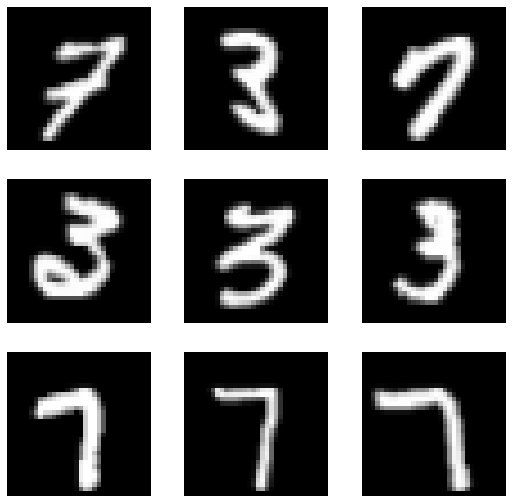

In [219]:
dls.show_batch()

### 2단계 

In [220]:
counterfeiter = basic_generator(32,n_channels=3,n_extra_layers=1)
police = basic_critic(32,n_channels=3,n_extra_layers=1)

- 32는 사이즈
- 채널은 컬러이면 3이지만 이건 흑백이라도 3으로 표현해봄

In [221]:
GANLearner.wgan??

Signature:
GANLearner.wgan(
    dls,
    generator,
    critic,
    switcher=None,
    clip=0.01,
    switch_eval=False,
    gen_first=False,
    show_img=True,
    cbs=None,
    metrics=None,
    loss_func=None,
    opt_func=<function Adam at 0x7f9971cbd550>,
    lr=0.001,
    splitter=<function trainable_params at 0x7f997f97d940>,
    path=None,
    model_dir='models',
    wd=None,
    wd_bn_bias=False,
    train_bn=True,
    moms=(0.95, 0.85, 0.95),
)
Source:   
    @classmethod
    def wgan(cls, dls, generator, critic, switcher=None, clip=0.01, switch_eval=False, **kwargs):
        "Create a WGAN from `data`, `generator` and `critic`."
        if switcher is None: switcher = FixedGANSwitcher(n_crit=5, n_gen=1)
        return cls(dls, generator, critic, _tk_mean, _tk_diff, switcher=switcher, clip=clip, switch_eval=switch_eval, **kwargs)
File:      ~/anaconda3/envs/csy/lib/python3.8/site-packages/fastai/vision/gan.py
Type:      method


In [222]:
lrnr = GANLearner.wgan(dls,counterfeiter,police) 

### 3단계

`-` lrnr.fit(10) 진행 

In [223]:
lrnr.fit(10)

epoch,train_loss,valid_loss,gen_loss,crit_loss,time
0,-0.545630,0.366817,0.366817,-0.762888,00:04
1,-0.579412,0.284769,0.284769,-0.767885,00:04
2,-0.582814,0.329190,0.329190,-0.764578,00:04
3,-0.574495,0.314856,0.314856,-0.756972,00:04
4,-0.575296,0.230616,0.230616,-0.761454,00:04
5,-0.569071,0.201164,0.201164,-0.736055,00:04
6,-0.564014,0.301937,0.301937,-0.735373,00:04
7,-0.550777,0.264531,0.264531,-0.733511,00:04
8,-0.506112,0.296727,0.296727,-0.723755,00:04
9,-0.496314,0.335372,0.335372,-0.619780,00:04


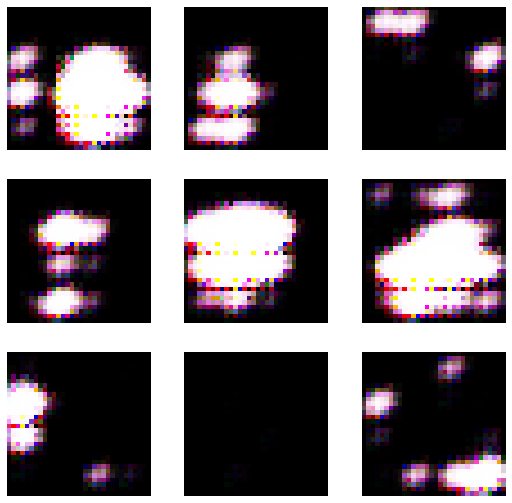

In [224]:
lrnr.show_results()

`-` lrnr.fit(10) 추가로 진행 // 총20회

In [225]:
lrnr.fit(10)

epoch,train_loss,valid_loss,gen_loss,crit_loss,time
0,-0.497216,0.292087,0.292087,-0.705264,00:04
1,-0.498016,0.268067,0.268067,-0.717888,00:04
2,-0.541356,0.225287,0.225287,-0.628605,00:04
3,-0.553956,0.253199,0.253199,-0.737576,00:04
4,-0.513534,0.300109,0.300109,-0.720251,00:04
5,-0.521772,0.269734,0.269734,-0.727270,00:04
6,-0.449470,0.253972,0.253972,-0.635818,00:04
7,-0.544340,0.317594,0.317594,-0.729805,00:04
8,-0.436776,0.091559,0.091559,-0.385206,00:04
9,-0.470905,0.223825,0.223825,-0.611041,00:04


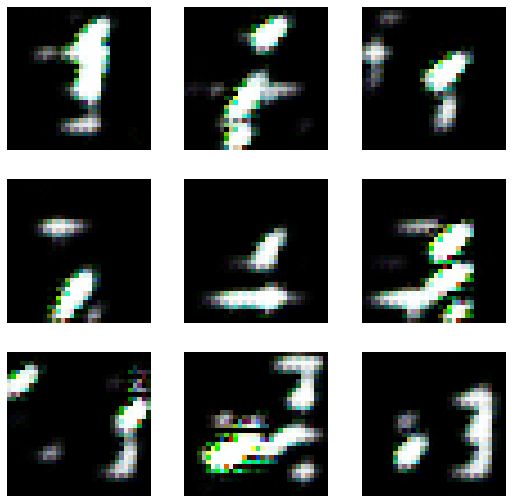

In [226]:
lrnr.show_results()

`-` lrnr.fit(10) 추가로 진행 // 총30회

In [227]:
lrnr.fit(10)

epoch,train_loss,valid_loss,gen_loss,crit_loss,time
0,-0.472400,0.305713,0.305713,-0.669824,00:05
1,-0.502830,0.236568,0.236568,-0.691709,00:04
2,-0.458752,0.210837,0.210837,-0.671015,00:04
3,-0.463963,0.285307,0.285307,-0.615843,00:04
4,-0.456188,0.132975,0.132975,-0.648182,00:04
5,-0.441394,0.203284,0.203284,-0.242602,00:04
6,-0.332576,-0.008596,-0.008596,-0.437781,00:04
7,-0.206461,0.227931,0.227931,-0.309338,00:04
8,-0.232229,0.164490,0.164490,-0.085335,00:04
9,-0.311977,0.224293,0.224293,-0.458853,00:04


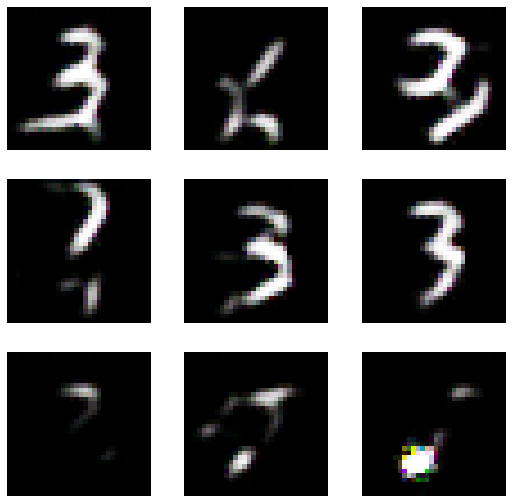

In [228]:
lrnr.show_results()

`-` lrnr.fit(10) 추가로 진행 // 총 60회

In [229]:
lrnr.fit(30)

epoch,train_loss,valid_loss,gen_loss,crit_loss,time
0,-0.224366,0.071244,0.071244,-0.320369,00:04
1,-0.272674,0.221342,0.221342,-0.403603,00:04
2,-0.267235,0.164438,0.164438,-0.279046,00:04
3,-0.282054,0.314051,0.314051,-0.027481,00:04
4,-0.244775,0.157024,0.157024,-0.541953,00:04
5,-0.182147,-0.009416,-0.009416,-0.146336,00:04
6,-0.182062,0.310553,0.310553,-0.034981,00:04
7,-0.074710,-0.059480,-0.059480,-0.048830,00:04
8,-0.078458,0.043947,0.043947,-0.090175,00:04
9,-0.045052,-0.092213,-0.092213,-0.270790,00:04


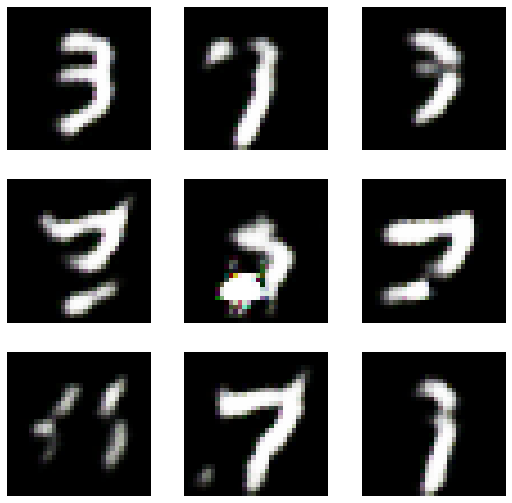

In [230]:
lrnr.show_results()

### 4단계 (없음)